In [1]:
import sys
print(sys.executable)

C:\Users\admin\anaconda3\python.exe


Source: https://www.kaggle.com/felixzhao/productdemandforecasting

### Context
The dataset contains historical product demand for a manufacturing company with footprints globally. The company provides thousands of products within dozens of product categories. There are four central warehouses to ship products within the region it is responsible for. Since the products are manufactured in different locations all over the world, it normally takes more than one month to ship products via ocean to different central warehouses. If forecasts for each product in different central with reasonable accuracy for the monthly demand for month after next can be achieved, it would be beneficial to the company in multiple ways.

### Content
Historical Product Demand.csv - CSV data file containing product demand for encoded product id's

### Acknowledgements
This dataset is all real-life data and products/warehouse and category information encoded.

### Inspiration
Is it possible to make forecasts for thousands of products (some of them are highly variable in terms of monthly demand) for the the month after next?

In [2]:
#Extract data
import pandas as pd
basedata = pd.read_csv('Historical Product Demand.csv')

In [3]:
basedata.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [4]:
basedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


In [5]:
basedata['Product_Code'].value_counts()

Product_1359    16936
Product_1295    10575
Product_1378     9770
Product_0620     9428
Product_1286     8888
                ...  
Product_1912        2
Product_1703        1
Product_0465        1
Product_2099        1
Product_0853        1
Name: Product_Code, Length: 2160, dtype: int64

In [6]:
basedata['Warehouse'].value_counts()

Whse_J    764447
Whse_A    153574
Whse_S     88200
Whse_C     42354
Name: Warehouse, dtype: int64

In [7]:
basedata['Product_Category'].value_counts()

Category_019    481099
Category_005    101671
Category_001     97787
Category_007     82402
Category_021     52011
Category_006     35577
Category_028     31302
Category_011     23208
Category_015     22954
Category_024     20885
Category_009     19738
Category_026     14803
Category_030     12997
Category_032      9296
Category_022      8657
Category_023      7899
Category_018      5239
Category_003      4189
Category_013      3743
Category_020      3490
Category_031      2280
Category_033      1849
Category_008      1560
Category_012      1147
Category_010       976
Category_029       671
Category_017       615
Category_004       329
Category_002        77
Category_016        37
Category_025        35
Category_014        26
Category_027        26
Name: Product_Category, dtype: int64

In [8]:
basedata['Order_Demand'].value_counts().index.tolist()

['1000 ',
 '100 ',
 '1 ',
 '2000 ',
 '500 ',
 '10000 ',
 '200 ',
 '5000 ',
 '10 ',
 '2 ',
 '300 ',
 '3000 ',
 '0 ',
 '50 ',
 '5 ',
 '20000 ',
 '3 ',
 '20 ',
 '4 ',
 '25 ',
 '400 ',
 '4000 ',
 '6 ',
 '30 ',
 '50000 ',
 '30000 ',
 '600 ',
 '2500 ',
 '6000 ',
 '8 ',
 '12 ',
 '1500 ',
 '250 ',
 '25000 ',
 '15000 ',
 '40 ',
 '150 ',
 '800 ',
 '60 ',
 '100000 ',
 '15 ',
 '8000 ',
 '40000 ',
 '700 ',
 '24 ',
 '7000 ',
 '7 ',
 '1200 ',
 '120 ',
 '18 ',
 '900 ',
 '16 ',
 '60000 ',
 '9 ',
 '12000 ',
 '9000 ',
 '80 ',
 '14 ',
 '48 ',
 '75 ',
 '36 ',
 '(100)',
 '11 ',
 '1100 ',
 '70 ',
 '11000 ',
 '27 ',
 '200000 ',
 '1300 ',
 '(200)',
 '1400 ',
 '125 ',
 '13 ',
 '90 ',
 '1600 ',
 '13000 ',
 '1800 ',
 '72 ',
 '750 ',
 '22 ',
 '150000 ',
 '54 ',
 '7500 ',
 '75000 ',
 '80000 ',
 '14000 ',
 '240 ',
 '96 ',
 '16000 ',
 '350 ',
 '17 ',
 '1700 ',
 '(1000)',
 '32 ',
 '35000 ',
 '35 ',
 '(1)',
 '70000 ',
 '18000 ',
 '28 ',
 '26 ',
 '180 ',
 '(300)',
 '42 ',
 '19 ',
 '2400 ',
 '3500 ',
 '17000 ',
 '2100 ',

In [9]:
basedata.dropna(inplace=True)

In [10]:
basedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1037336 non-null  object
 1   Warehouse         1037336 non-null  object
 2   Product_Category  1037336 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1037336 non-null  object
dtypes: object(5)
memory usage: 47.5+ MB


### Clustering Without Time Series

#### Feature Engineering

In [11]:
#Change product code and category to numeric
data = basedata
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1037336 non-null  object
 1   Warehouse         1037336 non-null  object
 2   Product_Category  1037336 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1037336 non-null  object
dtypes: object(5)
memory usage: 47.5+ MB


In [13]:
#data['Product_Code']=data['Product_Code'].str.replace("Product_","").astype('int64')

In [14]:
#data['Product_Category']=basedata['Product_Category'].str.replace("Category_","").astype('int64')

In [15]:
#Change order demand to float
data['Order_Demand']=data['Order_Demand'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float)

In [16]:
#Change Date to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [17]:
#Check how many years in the dataset
data['Date'].dt.year.value_counts()

2013    218298
2014    216404
2015    209661
2012    203635
2016    188645
2011       640
2017        53
Name: Date, dtype: int64

In [18]:
#Check for unbalanced years
data[data['Date'].dt.year==2011]['Date'].dt.month.value_counts()

12    598
11     31
9       4
10      3
6       2
1       1
5       1
Name: Date, dtype: int64

In [19]:
#Create month and year column
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Month,Year
0,Product_0993,Whse_J,Category_028,2012-07-27,100.0,7,2012
1,Product_0979,Whse_J,Category_028,2012-01-19,500.0,1,2012
2,Product_0979,Whse_J,Category_028,2012-02-03,500.0,2,2012
3,Product_0979,Whse_J,Category_028,2012-02-09,500.0,2,2012
4,Product_0979,Whse_J,Category_028,2012-03-02,500.0,3,2012


### Clustering on yearly demand

In [20]:
data.groupby(['Year','Product_Code'])[['Order_Demand']].sum()

Order_Demand
Year Product_Code              
2011 Product_0001         300.0
     Product_0002      221000.0
     Product_0019         700.0
     Product_0030         650.0
     Product_0031        -100.0
...                         ...
2017 Product_1926           2.0
     Product_1938          20.0
     Product_1954           7.0
     Product_1970        4000.0
     Product_1993        1000.0

[10687 rows x 1 columns]

In [21]:
data_yearly=data.groupby(['Year','Product_Code'])[['Order_Demand']].sum().unstack(level=0, fill_value=0)

In [22]:
data_yearly

Order_Demand                                              \
Year                 2011       2012       2013       2014       2015   
Product_Code                                                            
Product_0001        300.0   110100.0    97500.0    96100.0    70600.0   
Product_0002     221000.0  1077500.0  1524500.0  2078500.0  2686500.0   
Product_0003          0.0    13900.0    18900.0    20200.0    40400.0   
Product_0004          0.0     4800.0    20700.0    24500.0    39000.0   
Product_0005          0.0     1000.0     4800.0     4200.0     6200.0   
...                   ...        ...        ...        ...        ...   
Product_2168          4.0    10621.0     9792.0    11126.0    10333.0   
Product_2169          2.0     5945.0     5662.0     3739.0     5454.0   
Product_2170          2.0      387.0      307.0      357.0      461.0   
Product_2171          0.0      412.0      467.0      403.0      422.0   
Product_2172          0.0     1200.0     1000.0     1100.0     3700.0   

                              
Year               2016 2017  
Product_Code                  
Product_0001    77800.0  0.0  
Product_0002  1168000.0  0.0  
Product_0003    24300.0  0.0  
Product_0004    35000.0  0.0  
Product_0005     6100.0  0.0  
...                 ...  ...  
Product_2168     6670.0  0.0  
Product_2169     2694.0  0.0  
Product_2170      328.0  0.0  
Product_2171      423.0  0.0  
Product_2172    10300.0  0.0  

[2160 rows x 7 columns]

#### Kmeans with PCA on yearly demand

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [24]:
# Use yearly order demand as features 
X = data_yearly['Order_Demand']

In [25]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [26]:
# Instantiate the PCA class 
yearly_pca = PCA()

# Fit PCA with standardised features
yearly_PCs = yearly_pca.fit_transform(Xs)


In [27]:
yearly_pca.explained_variance_ratio_

array([7.76612962e-01, 1.44680119e-01, 7.14284705e-02, 3.82245433e-03,
       1.85557119e-03, 1.01533382e-03, 5.85089160e-04])

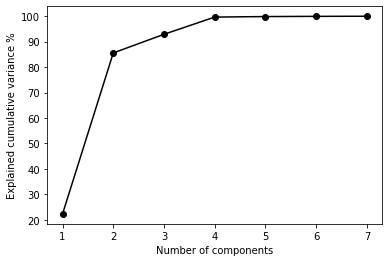

In [28]:
# Plot cumulative variance explained vs number of components
plt.plot(range(1, 8), 100 - (100*yearly_pca.explained_variance_ratio_), '-o', color='black')
plt.xlabel('Number of components')
plt.ylabel('Explained cumulative variance %')
plt.show()

In [29]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(yearly_PCs)
PCA_components.head()

,0,1,2,3,4,5,6
0,-0.272761,-0.013090,0.025625,-0.015131,0.007503,-0.012001,-0.000509
1,1.167855,2.600589,0.667817,0.364631,-0.313822,0.196226,0.081029
2,-0.317492,-0.017084,0.037405,-0.003995,0.000659,-0.001273,0.002941
3,-0.316671,-0.017593,0.036506,-0.000964,-0.002381,-0.002839,0.002240
4,-0.330037,-0.016929,0.042025,-0.005990,0.000714,-0.005615,0.001626


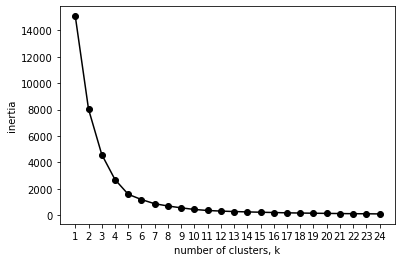

In [30]:
ks = range(1, 25)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:4])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [31]:
#Set optimum no of clusters as 5

model = KMeans(n_clusters=5, random_state=0)
model.fit(PCA_components.iloc[:,:4])

label = model.labels_.astype(str)
label

array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U11')

In [32]:
data_yearly.reset_index()

Product_Code Order_Demand                                              \
Year                       2011       2012       2013       2014       2015   
0     Product_0001        300.0   110100.0    97500.0    96100.0    70600.0   
1     Product_0002     221000.0  1077500.0  1524500.0  2078500.0  2686500.0   
2     Product_0003          0.0    13900.0    18900.0    20200.0    40400.0   
3     Product_0004          0.0     4800.0    20700.0    24500.0    39000.0   
4     Product_0005          0.0     1000.0     4800.0     4200.0     6200.0   
...            ...          ...        ...        ...        ...        ...   
2155  Product_2168          4.0    10621.0     9792.0    11126.0    10333.0   
2156  Product_2169          2.0     5945.0     5662.0     3739.0     5454.0   
2157  Product_2170          2.0      387.0      307.0      357.0      461.0   
2158  Product_2171          0.0      412.0      467.0      403.0      422.0   
2159  Product_2172          0.0     1200.0     1000.0     1100.0     3700.0   

                      
Year       2016 2017  
0       77800.0  0.0  
1     1168000.0  0.0  
2       24300.0  0.0  
3       35000.0  0.0  
4        6100.0  0.0  
...         ...  ...  
2155     6670.0  0.0  
2156     2694.0  0.0  
2157      328.0  0.0  
2158      423.0  0.0  
2159    10300.0  0.0  

[2160 rows x 8 columns]

In [33]:
#We create new dataframe with original features and addd PCA scores and assigned clusters
yearly_concat = pd.concat([data_yearly.reset_index(), PCA_components],axis=1)
yearly_concat.columns.values[-7:] = [f'Component {i}' for i in range (1,8)]
#The last column added contains pca k-means clustering labels
yearly_concat['Segment K-means PCA'] = model.labels_
yearly_concat

,"(Product_Code, )","(Order_Demand, 2011)","(Order_Demand, 2012)","(Order_Demand, 2013)","(Order_Demand, 2014)","(Order_Demand, 2015)","(Order_Demand, 2016)","(Order_Demand, 2017)",Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Segment K-means PCA
0,Product_0001,300.0,110100.0,97500.0,96100.0,70600.0,77800.0,0.0,-0.272761,-0.013090,0.025625,-0.015131,0.007503,-0.012001,-0.000509,0
1,Product_0002,221000.0,1077500.0,1524500.0,2078500.0,2686500.0,1168000.0,0.0,1.167855,2.600589,0.667817,0.364631,-0.313822,0.196226,0.081029,0
2,Product_0003,0.0,13900.0,18900.0,20200.0,40400.0,24300.0,0.0,-0.317492,-0.017084,0.037405,-0.003995,0.000659,-0.001273,0.002941,0
3,Product_0004,0.0,4800.0,20700.0,24500.0,39000.0,35000.0,0.0,-0.316671,-0.017593,0.036506,-0.000964,-0.002381,-0.002839,0.002240,0
4,Product_0005,0.0,1000.0,4800.0,4200.0,6200.0,6100.0,0.0,-0.330037,-0.016929,0.042025,-0.005990,0.000714,-0.005615,0.001626,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Product_2168,4.0,10621.0,9792.0,11126.0,10333.0,6670.0,0.0,-0.326571,-0.016655,0.041175,-0.007794,0.001889,-0.005442,0.001007,0
2156,Product_2169,2.0,5945.0,5662.0,3739.0,5454.0,2694.0,0.0,-0.329869,-0.016709,0.042269,-0.007507,0.001928,-0.005628,0.001740,0
2157,Product_2170,2.0,387.0,307.0,357.0,461.0,328.0,0.0,-0.332719,-0.016754,0.043121,-0.006779,0.001540,-0.005853,0.001319,0
2158,Product_2171,0.0,412.0,467.0,403.0,422.0,423.0,0.0,-0.332685,-0.016781,0.043099,-0.006791,0.001521,-0.005890,0.001329,0


In [34]:
#Show the number of data in each culture
yearly_concat['Segment K-means PCA'].value_counts()

0    2128
3      28
4       2
2       1
1       1
Name: Segment K-means PCA, dtype: int64

We are unable to get meaningful clusters from yearly analysis. Conclude that there is no significant product changes across the year.

In [35]:
#yearly_concat[yearly_concat['Segment K-means PCA']==3]

In [36]:
#Check that there are 2160 unique values for product code
yearly_concat.iloc[:,0].value_counts()

Product_0001    1
Product_1446    1
Product_1460    1
Product_1459    1
Product_1458    1
               ..
Product_0715    1
Product_0714    1
Product_0713    1
Product_0712    1
Product_2172    1
Name: (Product_Code, ), Length: 2160, dtype: int64

In [37]:
yearly_clusters = yearly_concat.groupby(['Segment K-means PCA']).sum().iloc[:,0:7]
yearly_clusters.T

Segment K-means PCA,0,1,2,3,4
"(Order_Demand, 2011)",1603986.0,0.0,3366000.0,2540000.0,0.0
"(Order_Demand, 2012)",339417807.0,93565000.0,43908000.0,374671100.0,90181000.0
"(Order_Demand, 2013)",366119598.0,102554000.0,32379000.0,409424200.0,98742000.0
"(Order_Demand, 2014)",414256779.0,95109000.0,39728000.0,411698700.0,103480000.0
"(Order_Demand, 2015)",433956965.0,93060000.0,35136000.0,430998000.0,102294000.0
"(Order_Demand, 2016)",386418129.0,86322000.0,15260000.0,392711000.0,104657000.0
"(Order_Demand, 2017)",139967.0,100000.0,0.0,55000.0,0.0


<AxesSubplot:>

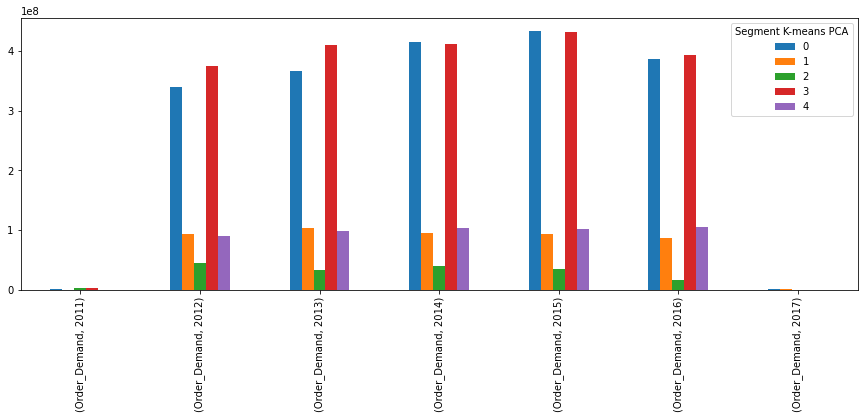

In [38]:
yearly_clusters.T.plot(kind='bar',figsize=(15,5))

array([<AxesSubplot:ylabel='(Order_Demand, 2011)'>,
       <AxesSubplot:ylabel='(Order_Demand, 2012)'>,
       <AxesSubplot:ylabel='(Order_Demand, 2013)'>,
       <AxesSubplot:ylabel='(Order_Demand, 2014)'>,
       <AxesSubplot:ylabel='(Order_Demand, 2015)'>,
       <AxesSubplot:ylabel='(Order_Demand, 2016)'>,
       <AxesSubplot:ylabel='(Order_Demand, 2017)'>], dtype=object)

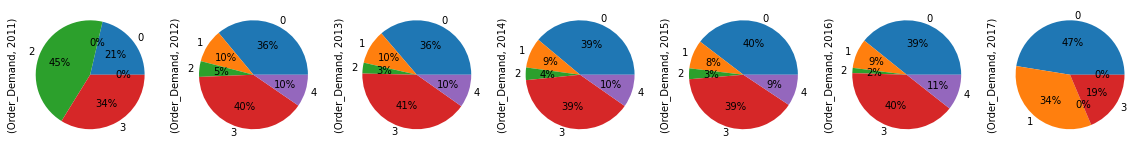

In [39]:
yearly_clusters.plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(20,20),legend=False)

Conclusion: From the above plot, we can draw the following conclusions
1. Demand for group 2 products seems to be on the decline. There is no significant variation across the years in the demand for other product types (i.e. no group of products that has been phased out/ obsolete). 
We should not be planning for products in group 2.

2. There are 2128 product types that falls under cluster 0 but it accounts for similar proportion of demand ~40%

### Clustering on monthly demand (Not presented as result similar to yearly demand)

#### Feature engineering

In [49]:
data

,Product_Code,Warehouse,Product_Category,Order_Demand,Month,Year
Date,,,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100.0,7,2012
2012-01-19,Product_0979,Whse_J,Category_028,500.0,1,2012
2012-02-03,Product_0979,Whse_J,Category_028,500.0,2,2012
2012-02-09,Product_0979,Whse_J,Category_028,500.0,2,2012
2012-03-02,Product_0979,Whse_J,Category_028,500.0,3,2012
...,...,...,...,...,...,...
2016-04-27,Product_1791,Whse_J,Category_006,1000.0,4,2016
2016-04-27,Product_1974,Whse_J,Category_006,1.0,4,2016
2016-04-28,Product_1787,Whse_J,Category_006,2500.0,4,2016


In [162]:
#drop year 2011 and 2017 as the years have irrelevant demand trend
data_monthly=data[(data['Year']!=2011) & (data['Year']!=2017) ]
#group data by month
data_monthly=data_monthly.groupby(['Month','Product_Code'])[['Order_Demand']].sum().unstack(level=0, fill_value=0)

In [163]:
data_monthly

Order_Demand                                                     \
Month                  1          2         3         4         5         6    
Product_Code                                                                   
Product_0001      28400.0    41700.0   48600.0   27300.0   41500.0   32900.0   
Product_0002    1256000.0  1416000.0  775500.0  324000.0  513500.0  585500.0   
Product_0003       6500.0     9100.0    7700.0   13800.0   14300.0    7000.0   
Product_0004      15300.0     6000.0    9800.0   10500.0    8500.0    8400.0   
Product_0005       1700.0      200.0    1900.0    1400.0     700.0     600.0   
...                   ...        ...       ...       ...       ...       ...   
Product_2168       3594.0     5239.0    3684.0    3410.0    2717.0    4538.0   
Product_2169       1528.0     1637.0    1580.0    1912.0    1651.0    2636.0   
Product_2170        221.0       80.0      93.0      69.0     192.0     236.0   
Product_2171        233.0      217.0     258.0     182.0     182.0     122.0   
Product_2172       1700.0     1400.0     500.0    1800.0    1700.0    2300.0   

                                                                          
Month               7         8         9         10        11        12  
Product_Code                                                              
Product_0001   45000.0   52700.0   33700.0   41700.0   37800.0   20800.0  
Product_0002  480500.0  555000.0  994500.0  515500.0  505000.0  614000.0  
Product_0003   11800.0    9900.0    7700.0   10700.0   14200.0    5000.0  
Product_0004    9800.0   11800.0   10700.0   11000.0   11900.0   10300.0  
Product_0005    1400.0    3200.0    2300.0    2400.0    5100.0    1400.0  
...                ...       ...       ...       ...       ...       ...  
Product_2168    3650.0    6043.0    2612.0    5636.0    3286.0    4133.0  
Product_2169    1955.0    2055.0    2192.0    2650.0    1507.0    2191.0  
Product_2170     127.0     208.0     160.0     165.0     161.0     128.0  
Product_2171     175.0     134.0     130.0     261.0     121.0     112.0  
Product_2172    1000.0     900.0    1700.0    1800.0    1700.0     800.0  

[2160 rows x 12 columns]

In [164]:
# Use yearly order demand as features 
X = data_monthly['Order_Demand']
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [165]:
# Instantiate the PCA class 
monthly_pca = PCA()

# Fit PCA with non-standardised features
monthly_PCs = monthly_pca.fit_transform(Xs)

In [166]:
monthly_pca.explained_variance_ratio_

array([9.86629342e-01, 3.94225078e-03, 2.54401096e-03, 1.89512205e-03,
       1.55712854e-03, 1.06551289e-03, 6.87462926e-04, 4.82935306e-04,
       3.94391932e-04, 3.82035094e-04, 2.51859411e-04, 1.67947747e-04])

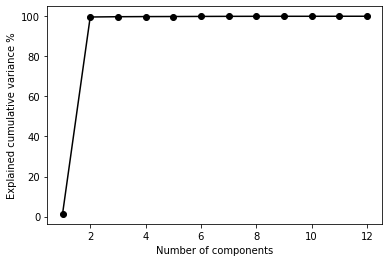

In [167]:
# Plot cumulative variance explained vs number of components
plt.plot(range(1, 13), 100 - (100*monthly_pca.explained_variance_ratio_), '-o', color='black')
plt.xlabel('Number of components')
plt.ylabel('Explained cumulative variance %')
plt.show()

In [168]:
#Check total order demands in respective months
for i in range(1,13):
    print(X[i].sum())

427371732.0
404597396.0
461797574.0
422710848.0
412237227.0
429253815.0
458951249.0
385119643.0
397542099.0
448436954.0
428795082.0
419233659.0


In [169]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(monthly_PCs)
PCA_components.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.411751,-0.000475,0.004305,0.000524,0.008524,0.010207,-0.005766,-0.004919,-0.014240,0.007911,-0.007754,-0.002646
1,1.344640,-0.056518,0.037497,0.052685,0.484793,-0.570674,0.032195,-0.051365,0.050441,0.141501,-0.320811,-0.231356
2,-0.484326,-0.004379,-0.002324,0.006333,0.006749,0.004873,-0.006971,-0.001228,-0.003338,-0.005490,0.002582,0.002385
3,-0.482910,-0.000923,-0.006538,0.006568,0.004226,0.000749,-0.003081,-0.001831,-0.000837,-0.006250,-0.001933,-0.000304
4,-0.504912,-0.002551,-0.004597,0.005685,0.003741,0.000213,-0.004462,-0.002021,-0.002992,-0.005097,0.000083,0.000435


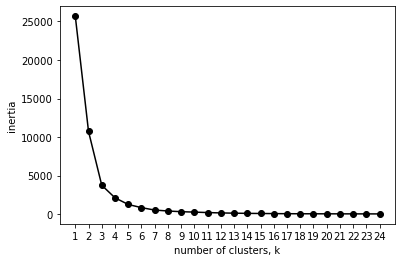

In [170]:
ks = range(1, 25)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [171]:
#Set optimum no of clusters as 5

model = KMeans(n_clusters=5, random_state=0)
model.fit(PCA_components.iloc[:,:4])

label = model.labels_.astype(str)
label

array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U11')

In [172]:
#We create new dataframe with original features and addd PCA scores and assigned clusters
monthly_concat = pd.concat([data_monthly.reset_index(), PCA_components],axis=1)
monthly_concat.columns.values[-12:] = [f'Component {i}' for i in range (1,13)]
#The last column added contains pca k-means clustering labels
monthly_concat['Segment K-means PCA'] = model.labels_
monthly_concat

,"(Product_Code, )","(Order_Demand, 1)","(Order_Demand, 2)","(Order_Demand, 3)","(Order_Demand, 4)","(Order_Demand, 5)","(Order_Demand, 6)","(Order_Demand, 7)","(Order_Demand, 8)","(Order_Demand, 9)",...,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11,Component 12,Segment K-means PCA
0,Product_0001,28400.0,41700.0,48600.0,27300.0,41500.0,32900.0,45000.0,52700.0,33700.0,...,0.000524,0.008524,0.010207,-0.005766,-0.004919,-0.014240,0.007911,-0.007754,-0.002646,0
1,Product_0002,1256000.0,1416000.0,775500.0,324000.0,513500.0,585500.0,480500.0,555000.0,994500.0,...,0.052685,0.484793,-0.570674,0.032195,-0.051365,0.050441,0.141501,-0.320811,-0.231356,0
2,Product_0003,6500.0,9100.0,7700.0,13800.0,14300.0,7000.0,11800.0,9900.0,7700.0,...,0.006333,0.006749,0.004873,-0.006971,-0.001228,-0.003338,-0.005490,0.002582,0.002385,0
3,Product_0004,15300.0,6000.0,9800.0,10500.0,8500.0,8400.0,9800.0,11800.0,10700.0,...,0.006568,0.004226,0.000749,-0.003081,-0.001831,-0.000837,-0.006250,-0.001933,-0.000304,0
4,Product_0005,1700.0,200.0,1900.0,1400.0,700.0,600.0,1400.0,3200.0,2300.0,...,0.005685,0.003741,0.000213,-0.004462,-0.002021,-0.002992,-0.005097,0.000083,0.000435,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Product_2168,3594.0,5239.0,3684.0,3410.0,2717.0,4538.0,3650.0,6043.0,2612.0,...,0.004686,0.003939,-0.000393,-0.005140,-0.003189,-0.000783,-0.003824,-0.001425,0.001338,0
2156,Product_2169,1528.0,1637.0,1580.0,1912.0,1651.0,2636.0,1955.0,2055.0,2192.0,...,0.006267,0.003492,-0.000649,-0.005254,-0.001465,-0.000723,-0.004349,-0.000213,0.001190,0
2157,Product_2170,221.0,80.0,93.0,69.0,192.0,236.0,127.0,208.0,160.0,...,0.006499,0.004073,-0.000660,-0.004985,-0.001483,-0.001169,-0.004851,-0.000049,0.001037,0
2158,Product_2171,233.0,217.0,258.0,182.0,182.0,122.0,175.0,134.0,130.0,...,0.006424,0.004160,-0.000720,-0.004989,-0.001404,-0.001215,-0.004896,-0.000056,0.001155,0


In [173]:
monthly_concat['Segment K-means PCA'].value_counts()

0    2106
4      32
2      18
1       3
3       1
Name: Segment K-means PCA, dtype: int64

In [174]:
monthly_clusters = monthly_concat.groupby(['Segment K-means PCA']).sum().iloc[:,0:12]
monthly_clusters.T

Segment K-means PCA,0,1,2,3,4
"(Order_Demand, 1)",116043082.0,53091000.0,136104200.0,43613000.0,78520450.0
"(Order_Demand, 2)",117035496.0,60265000.0,113967600.0,36539000.0,76790300.0
"(Order_Demand, 3)",122137424.0,55093000.0,154247900.0,39928000.0,90391250.0
"(Order_Demand, 4)",115742798.0,54816000.0,130127800.0,39860000.0,82164250.0
"(Order_Demand, 5)",113769327.0,53992000.0,121980900.0,39564000.0,82931000.0
"(Order_Demand, 6)",117157215.0,57382000.0,133536300.0,38268000.0,82910300.0
"(Order_Demand, 7)",124545249.0,65689000.0,138669200.0,39409000.0,90638800.0
"(Order_Demand, 8)",108376893.0,47825000.0,114229400.0,34565000.0,80123350.0
"(Order_Demand, 9)",112876049.0,48939000.0,120615400.0,38062000.0,77049650.0
"(Order_Demand, 10)",124535504.0,57021000.0,139725300.0,42534000.0,84621150.0


<AxesSubplot:>

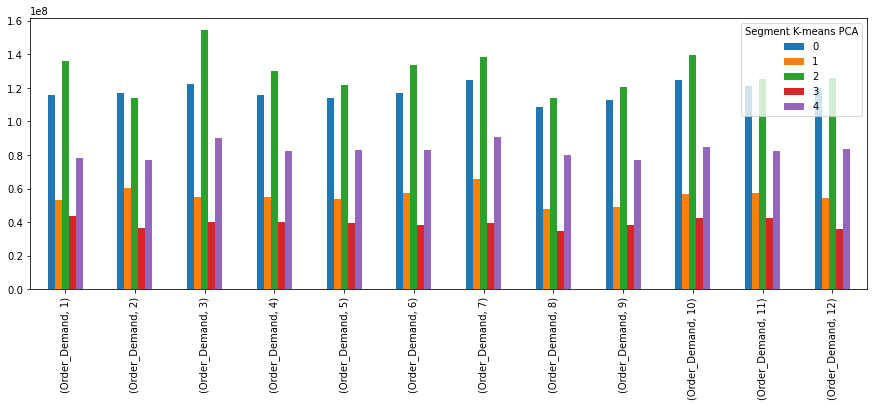

In [175]:
monthly_clusters.T.plot(kind='bar',figsize=(15,5))

array([<AxesSubplot:ylabel='(Order_Demand, 1)'>,
       <AxesSubplot:ylabel='(Order_Demand, 2)'>,
       <AxesSubplot:ylabel='(Order_Demand, 3)'>,
       <AxesSubplot:ylabel='(Order_Demand, 4)'>,
       <AxesSubplot:ylabel='(Order_Demand, 5)'>,
       <AxesSubplot:ylabel='(Order_Demand, 6)'>,
       <AxesSubplot:ylabel='(Order_Demand, 7)'>,
       <AxesSubplot:ylabel='(Order_Demand, 8)'>,
       <AxesSubplot:ylabel='(Order_Demand, 9)'>,
       <AxesSubplot:ylabel='(Order_Demand, 10)'>,
       <AxesSubplot:ylabel='(Order_Demand, 11)'>,
       <AxesSubplot:ylabel='(Order_Demand, 12)'>], dtype=object)

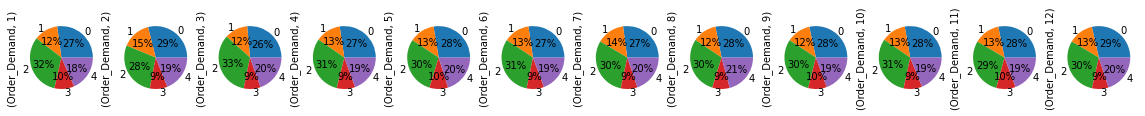

In [176]:
monthly_clusters.plot(kind='pie', subplots=True, autopct='%1.0f%%', figsize=(20,20),legend=False)

### Time Series Clustering using DTW

#### Preprocessing

In [40]:
basedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1037336 non-null  object        
 1   Warehouse         1037336 non-null  object        
 2   Product_Category  1037336 non-null  object        
 3   Date              1037336 non-null  datetime64[ns]
 4   Order_Demand      1037336 non-null  float64       
 5   Month             1037336 non-null  int64         
 6   Year              1037336 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 63.3+ MB


In [41]:
data_daily = basedata.drop(['Month','Year'], axis=1)

In [42]:
data_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1037336 non-null  object        
 1   Warehouse         1037336 non-null  object        
 2   Product_Category  1037336 non-null  object        
 3   Date              1037336 non-null  datetime64[ns]
 4   Order_Demand      1037336 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 47.5+ MB


In [43]:
data_daily.set_index('Date', inplace=True)

In [44]:
product_list = data_daily['Product_Code'].unique()

In [45]:
import numpy as np
product_list = np.sort(product_list)

In [46]:
len(product_list)

2160

In [34]:
#product_list[:3]

In [35]:
#product = product_list[1]
#data_daily[data_daily['Product_Code']==product].plot()

In [36]:
#year = '2016'
#data_daily.loc[year]

In [37]:
#3 products are in the same cluster but has very different seasonality trend

#for product in product_list[:3]:
    #data_daily[data_daily['Product_Code']==product].loc[year].plot()

In [38]:
# ax = plt.gca()
# for product in product_list[:3]:
    #data_daily[data_daily['Product_Code']==product].resample('M').sum().loc[year].plot(ax=ax)

In [39]:
# data_daily.resample('M').sum().index

In [40]:
# len(data_daily.resample('M').sum().index) #Note that we have 73 periods

tslearn expects a time series dataset to be formatted as a 3D numpy array. The three dimensions correspond to the number of time series, the number of measurements per time series and the number of dimensions respectively (n_ts, max_sz, d).

In [47]:
import tslearn
from tslearn.utils import to_time_series_dataset
from tslearn.utils import to_time_series

In [48]:
data_daily

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100.0
2012-01-19,Product_0979,Whse_J,Category_028,500.0
2012-02-03,Product_0979,Whse_J,Category_028,500.0
2012-02-09,Product_0979,Whse_J,Category_028,500.0
2012-03-02,Product_0979,Whse_J,Category_028,500.0
...,...,...,...,...
2016-04-27,Product_1791,Whse_J,Category_006,1000.0
2016-04-27,Product_1974,Whse_J,Category_006,1.0
2016-04-28,Product_1787,Whse_J,Category_006,2500.0


#### Trial on one Product Code - Not used for learning

In [275]:
sample = data_daily[data_daily['Product_Code']=='Product_2160'].resample('M').sum()

pandas.core.frame.DataFrame

In [84]:
# Number of months to cover
new_index = pd.date_range(start='2016-01-31', end='2016-12-31', freq='M')

In [356]:
sample = sample.reindex(new_index, fill_value=0)

In [357]:
sample.index

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

In [358]:
type(sample['Order_Demand'])

pandas.core.series.Series

In [359]:
to_time_series(sample['Order_Demand']).shape

(12, 1)

In [80]:
data_daily_raw = data_daily

#### Further processing to produce tslearn datasets

In [49]:
data_daily = data_daily.loc['2016']

In [50]:
data_daily

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2016-01-28,Product_1178,Whse_A,Category_024,10.0
2016-01-04,Product_1502,Whse_C,Category_019,100000.0
2016-01-06,Product_0190,Whse_A,Category_007,320.0
2016-01-06,Product_0337,Whse_A,Category_021,2.0
2016-01-06,Product_1053,Whse_A,Category_024,10.0
...,...,...,...,...
2016-04-27,Product_1791,Whse_J,Category_006,1000.0
2016-04-27,Product_1974,Whse_J,Category_006,1.0
2016-04-28,Product_1787,Whse_J,Category_006,2500.0


In [51]:
# Number of months to cover
new_index = pd.date_range(start='2016-01-31', end='2016-12-31', freq='M')
ts_list = []
for product in product_list:
    ts_list.append(data_daily[data_daily['Product_Code']==product]
                   .resample('M').sum()
                   .reindex(new_index, fill_value=0)['Order_Demand'].tolist())

In [52]:
formatted_ts_list = to_time_series_dataset(ts_list)

In [53]:
# Check that we have 2160 rows (product type) and 12 columns (months)
formatted_ts_list.shape

(2160, 12, 1)

In [54]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [55]:
X = TimeSeriesScalerMeanVariance().fit_transform(formatted_ts_list)

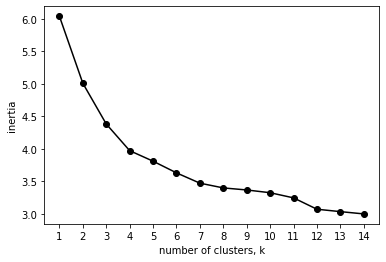

In [56]:
ks = range(1, 15)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    tsmodel = TimeSeriesKMeans(n_clusters=k, metric='dtw', random_state=0)
    
    # Fit model to samples
    tsmodel.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(tsmodel.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [57]:
model = TimeSeriesKMeans(n_clusters=5, metric="dtw",
                         random_state=0)
y_pred = model.fit_predict(X)

In [58]:
y_dataset = pd.DataFrame()
y_dataset['Product_Code'] = product_list
y_dataset['Clusters'] = y_pred

In [59]:
y_dataset['Clusters'].value_counts()

0    622
1    525
4    389
2    337
3    287
Name: Clusters, dtype: int64

In [60]:
y_dataset

,Product_Code,Clusters
0,Product_0001,1
1,Product_0002,3
2,Product_0003,1
3,Product_0004,3
4,Product_0005,0
...,...,...
2155,Product_2168,4
2156,Product_2169,0
2157,Product_2170,0
2158,Product_2171,3


In [61]:
#visualise the trends for each cluster
#ax = plt.gca()
#for product in y_dataset[y_dataset['Clusters']==3]['Product_Code']:
    #data_daily[data_daily['Product_Code']==product].resample('M').sum().plot(ax=ax, legend=False)

In [62]:
#ax = plt.gca()
#for product in y_dataset[y_dataset['Clusters']==4]['Product_Code']:
    #data_daily[data_daily['Product_Code']==product].resample('M').sum().plot(ax=ax, legend=False)

In [63]:
#for cluster in range(5):
    #ax = plt.gca()
    #for product in y_dataset[y_dataset['Clusters']==cluster]['Product_Code']:
        #data_daily[data_daily['Product_Code']==product].resample('M').sum().plot(ax=ax, legend=False)
    #plt.show()

In [64]:
sz = X.shape[1]
sz

12

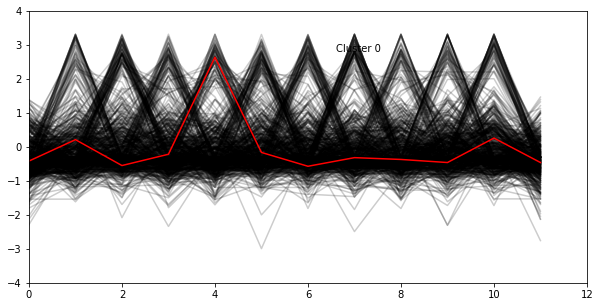

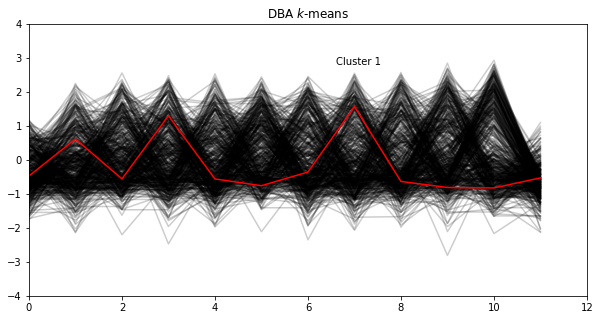

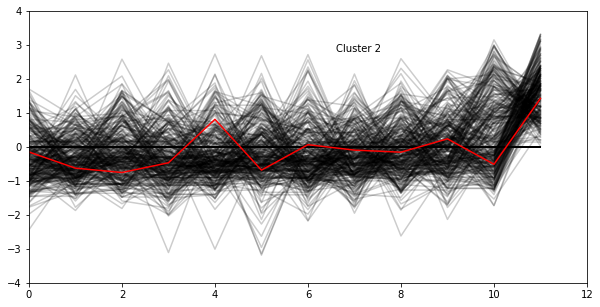

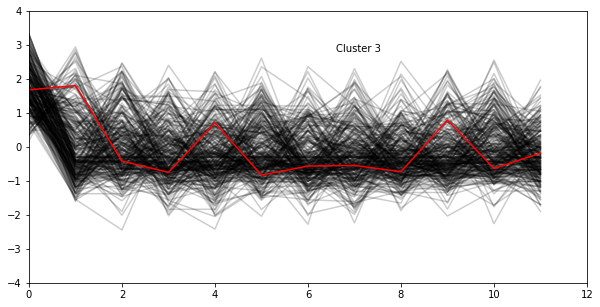

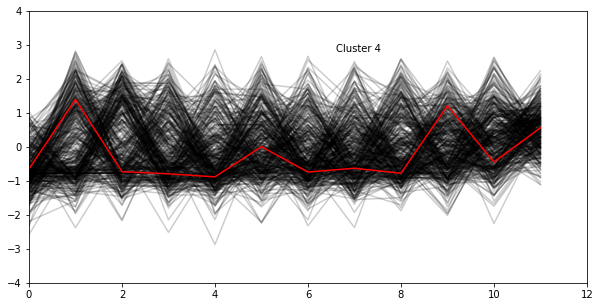

In [112]:
for cluster in range(5):
    plt.figure(figsize = (10,5))
    plt.subplot()
    for xx in X[y_pred == cluster]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model.cluster_centers_[cluster].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (cluster),
             transform=plt.gca().transAxes)
    if cluster == 1:
        plt.title("DBA $k$-means")

In [67]:
basedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1037336 non-null  object        
 1   Warehouse         1037336 non-null  object        
 2   Product_Category  1037336 non-null  object        
 3   Date              1037336 non-null  datetime64[ns]
 4   Order_Demand      1037336 non-null  float64       
 5   Month             1037336 non-null  int64         
 6   Year              1037336 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 63.3+ MB


In [68]:
ts_data = basedata

In [97]:
#Include the clusters into base data

ts_data['clusters']= ts_data['Product_Code']

for product in y_dataset['Product_Code']:
    ts_data.loc[ts_data.Product_Code==product,['clusters']]=y_dataset[y_dataset['Product_Code']==product]['Clusters'].values[0]

In [98]:
#ts_data.loc[ts_data.Product_Code=='Product_0001',['clusters']]=1

In [99]:
#y_dataset[y_dataset['Product_Code']=='Product_0001']['Clusters'].values[0]

In [100]:
#y_dataset['Product_Code']

In [101]:
ts_data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Month,Year,clusters
0,Product_0993,Whse_J,Category_028,2012-07-27,100.0,7,2012,1
1,Product_0979,Whse_J,Category_028,2012-01-19,500.0,1,2012,1
2,Product_0979,Whse_J,Category_028,2012-02-03,500.0,2,2012,1
3,Product_0979,Whse_J,Category_028,2012-02-09,500.0,2,2012,1
4,Product_0979,Whse_J,Category_028,2012-03-02,500.0,3,2012,1


In [108]:
ts_warehouse = ts_data.groupby(['Warehouse','clusters']).sum()['Order_Demand']

<AxesSubplot:xlabel='Warehouse,clusters'>

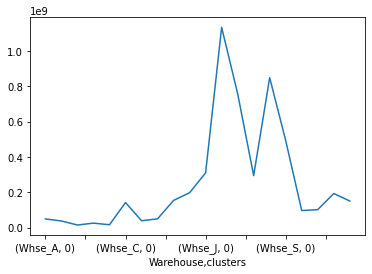

In [109]:
#ts_warehouse.plot(subplots)

In [110]:
ts_warehouse

Warehouse  clusters
Whse_A     0           4.934804e+07
           1           3.753959e+07
           2           1.475480e+07
           3           2.536400e+07
           4           1.625125e+07
Whse_C     0           1.417887e+08
           1           3.888110e+07
           2           4.961866e+07
           3           1.539226e+08
           4           1.976341e+08
Whse_J     0           3.098361e+08
           1           1.133455e+09
           2           7.581462e+08
           3           2.945370e+08
           4           8.485472e+08
Whse_S     0           4.926184e+08
           1           9.650208e+07
           2           1.016598e+08
           3           1.928634e+08
           4           1.505839e+08
Name: Order_Demand, dtype: float64

array([[<AxesSubplot:title={'center':'Whse_A'}, xlabel='clusters'>,
        <AxesSubplot:title={'center':'Whse_C'}, xlabel='clusters'>],
       [<AxesSubplot:title={'center':'Whse_J'}, xlabel='clusters'>,
        <AxesSubplot:title={'center':'Whse_S'}, xlabel='clusters'>]],
      dtype=object)

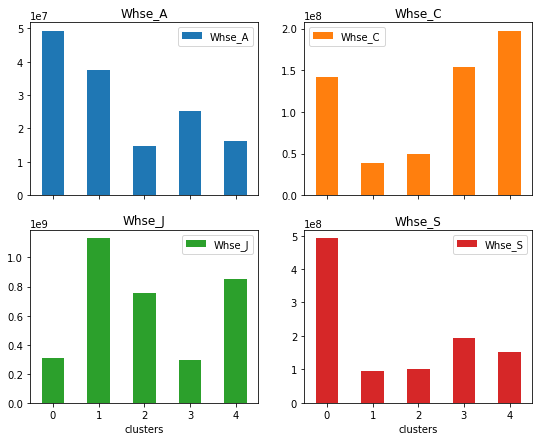

In [115]:
ts_warehouse.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(2, 2))